<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/02-linear-regression/LinearRegression_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please, fill in before you start:

First Name: Khushbu

Last Name:Saradva

Group: mAIDA22, Data Science, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

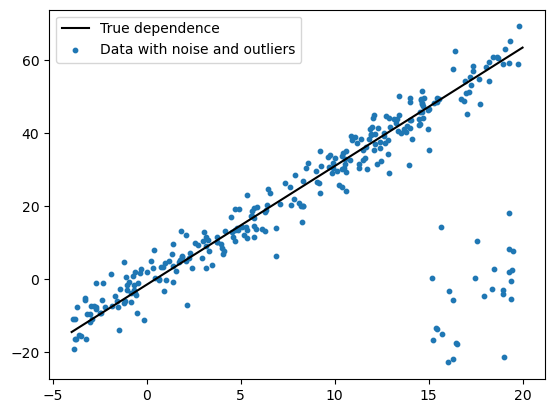

In [2]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

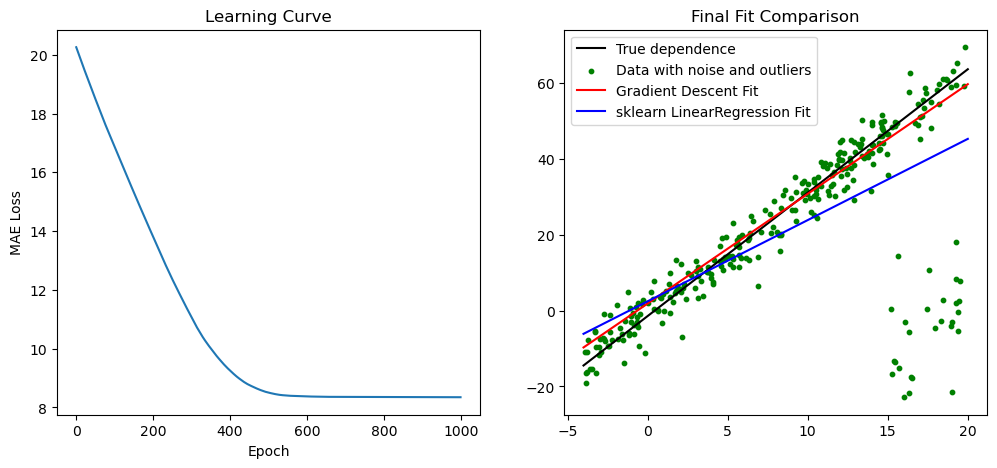

Gradient Descent Coefficients (w0, w1): [1.83213901 2.88823436]
sklearn LinearRegression Coefficients (intercept, slope): 2.4200915471027926 2.1385935013003734


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the MAE loss function
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

X_bias = np.column_stack((np.ones_like(X), X))

np.random.seed(0)
w = np.random.randn(2)

learning_rate = 0.001
num_epochs = 1000

loss_history = []

for epoch in range(num_epochs):
    y_pred = np.dot(X_bias, w)
    error = y - y_pred
    gradient = -np.sign(error) @ X_bias / len(X)
    w -= learning_rate * gradient
    mae = mean_absolute_error(y, y_pred)
    loss_history.append(mae)

reg = LinearRegression().fit(X, y)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.title('Learning Curve')

plt.subplot(1, 2, 2)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers', c='green', marker='o')
plt.plot(x, np.dot(np.column_stack((np.ones_like(x), x)), w), label='Gradient Descent Fit', c='red')
plt.plot(x, reg.predict(x.reshape(-1, 1)), label='sklearn LinearRegression Fit', c='blue')
plt.legend()
plt.title('Final Fit Comparison')
plt.show()

print("Gradient Descent Coefficients (w0, w1):", w)
print("sklearn LinearRegression Coefficients (intercept, slope):", reg.intercept_, reg.coef_[0])

## Task 2 (2 + 1 points)

* Wrap your solution from the previous task into a class. Plot the learning curve and the final fit. Compare and comment your results with the previos ones. **(2 points)**

* Make it possible to choose a loss function. **(1 point)**

In [17]:
from sklearn.base import BaseEstimator, RegressorMixin

In [23]:
class LinearRergessionSGD(BaseEstimator, RegressorMixin):
    def __init__(self):
        raise NotImplementedError

    def fit(self, x, y):
        raise NotImplementedError

    def predict(self, x):
        raise NotImplementedError
    
    def fit_predict(self, x, y):
        raise NotImplementedError

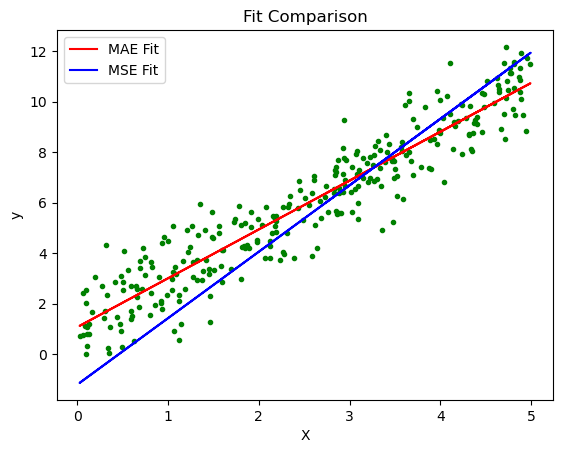

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionSGD:
    def __init__(self, learning_rate=0.001, num_epochs=1000, loss_function='mse'):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.loss_function = loss_function
        self.loss_history = []

    def fit(self, X, y):
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.random.randn(X_bias.shape[1])

        for epoch in range(self.num_epochs):
            y_pred = np.dot(X_bias, self.weights)
            error = y - y_pred

            if self.loss_function == 'mae':
                gradient = -np.sign(error) / len(X)
            elif self.loss_function == 'mse':
                gradient = -error / len(X)

            self.weights -= self.learning_rate * np.dot(X_bias.T, gradient)

            loss = self.calculate_loss(y, y_pred)
            self.loss_history.append(loss)

    def predict(self, X):
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return np.dot(X_bias, self.weights)

    def fit_predict(self, X, y):
        self.fit(X, y)
        return self.predict(X)

    def calculate_loss(self, y_true, y_pred):
        if self.loss_function == 'mae':
            return np.mean(np.abs(y_true - y_pred))
        elif self.loss_function == 'mse':
            return np.mean((y_true - y_pred) ** 2)

def generate_dataset(N=300):
    x = np.random.uniform(0, 5, size=N)
    y = 2 * x + 1 + np.random.randn(N)
    return x[:, None], y

if __name__ == "__main__":
    np.random.seed(0)
    X, y = generate_dataset()

    model_mae = LinearRegressionSGD(learning_rate=0.001, num_epochs=1000, loss_function='mae')
    model_mse = LinearRegressionSGD(learning_rate=0.001, num_epochs=1000, loss_function='mse')

    plt.plot(X, y, 'g.')
    plt.plot(X, model_mae.fit_predict(X, y), label='MAE Fit', c='red')
    plt.plot(X, model_mse.fit_predict(X, y), label='MSE Fit', c='blue')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Fit Comparison')
    plt.show()


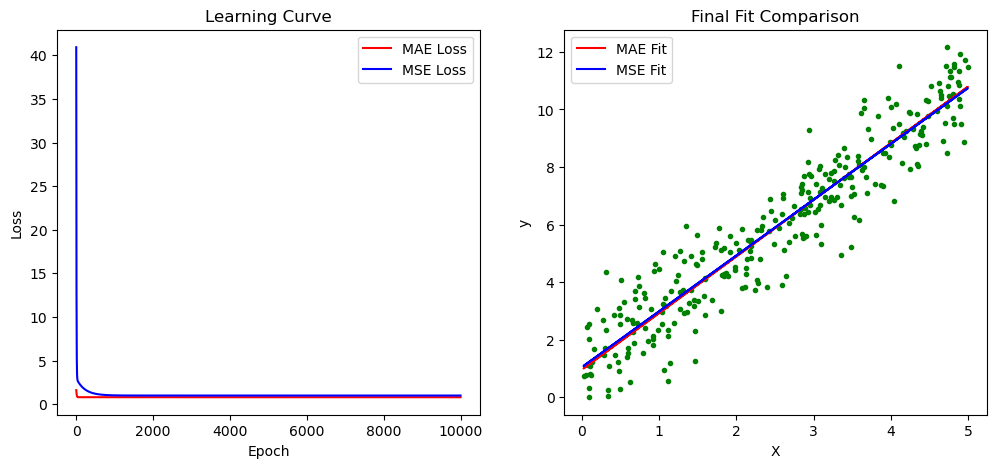

In [25]:
if __name__ == "__main__":
    np.random.seed(0)
    X, y = generate_dataset()

    model_mae = LinearRegressionSGD(learning_rate=0.01, num_epochs=10000, loss_function='mae')
    model_mse = LinearRegressionSGD(learning_rate=0.01, num_epochs=10000, loss_function='mse')

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    model_mae.fit(X, y)
    model_mse.fit(X, y)
    plt.plot(model_mae.loss_history, label='MAE Loss', c='red')
    plt.plot(model_mse.loss_history, label='MSE Loss', c='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(X, y, 'g.')
    plt.plot(X, model_mae.fit_predict(X, y), label='MAE Fit', c='red')
    plt.plot(X, model_mse.fit_predict(X, y), label='MSE Fit', c='blue')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Final Fit Comparison')
    plt.show()


Report : Improved Version step by step 